In [1]:
import tensorflow as tnfw
import os
import pandas as pd
import numpy as np

In [2]:
# data = pd.read_csv("sbin.csv")
sbin = pd.read_csv('sbin.csv', parse_dates=True, index_col='date', dayfirst=True)
sbin.sort_index(inplace=True)

In [3]:
# data.index = pd.to_datetime(df['date'], format='%d.%m.%Y %H:%M:%S')
# data.index = pd.to_datetime(data['date'], format='%d.%m.%Y')
# df1 = data.reset_index()['close']
# df1

In [4]:
sbin.columns

Index(['Sr', 'high', 'low', 'open', 'close', 'ltp', 'prev_ltp', 'traded_qty',
       'traded_val', '52_high', '52_low', 'total_trades', 'timestamp', 'vwap'],
      dtype='object')

In [5]:
sbin.index

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-06',
               '2020-01-07', '2020-01-08', '2020-01-09', '2020-01-10',
               '2020-01-13', '2020-01-14',
               ...
               '2024-02-01', '2024-02-02', '2024-02-05', '2024-02-06',
               '2024-02-07', '2024-02-08', '2024-02-09', '2024-02-12',
               '2024-02-13', '2024-02-14'],
              dtype='datetime64[ns]', name='date', length=1066, freq=None)

In [6]:
sbin.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1066 entries, 2020-01-01 to 2024-02-14
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sr            1066 non-null   int64  
 1   high          1066 non-null   float64
 2   low           1066 non-null   float64
 3   open          1066 non-null   float64
 4   close         1066 non-null   float64
 5   ltp           1066 non-null   float64
 6   prev_ltp      1066 non-null   float64
 7   traded_qty    1066 non-null   int64  
 8   traded_val    1066 non-null   int64  
 9   52_high       1066 non-null   float64
 10  52_low        1066 non-null   float64
 11  total_trades  1066 non-null   int64  
 12  timestamp     1066 non-null   object 
 13  vwap          1066 non-null   float64
dtypes: float64(9), int64(4), object(1)
memory usage: 124.9+ KB


In [7]:
sbin.describe()

,Sr,high,low,open,close,ltp,prev_ltp,traded_qty,traded_val,52_high,52_low,total_trades,vwap
count,1066.000000,1066.000000,1066.000000,1066.000000,1066.000000,1066.000000,1066.000000,1.066000e+03,1.066000e+03,1066.000000,1066.000000,1.066000e+03,1066.000000
mean,532.500000,443.420544,432.685835,438.417871,437.983161,438.040666,437.616463,3.205197e+07,1.130472e+10,505.778846,302.140947,2.628561e+05,438.165310
std,307.871997,146.328398,145.101099,145.666980,145.751996,145.729584,145.529714,2.723690e+07,7.206985e+09,110.743105,134.409538,1.304108e+05,145.725506
min,0.000000,153.200000,149.450000,151.950000,150.850000,151.100000,150.850000,1.947722e+06,1.133273e+09,331.900000,149.450000,5.393500e+04,151.820000
25%,266.250000,324.000000,317.250000,321.162500,320.350000,320.200000,319.100000,1.327810e+07,6.937396e+09,373.800000,160.850000,1.740700e+05,320.200000
50%,532.500000,479.750000,467.750000,473.200000,473.850000,473.975000,472.900000,2.122441e+07,9.467993e+09,542.300000,269.500000,2.294010e+05,474.040000
75%,798.750000,568.412500,559.512500,564.900000,564.275000,563.875000,563.587500,4.332273e+07,1.354199e+10,629.550000,425.000000,3.088008e+05,563.915000
max,1065.000000,748.500000,705.550000,726.000000,743.400000,743.000000,725.250000,2.149557e+08,8.549083e+10,748.500000,501.550000,1.155236e+06,730.540000


<Axes: xlabel='date'>

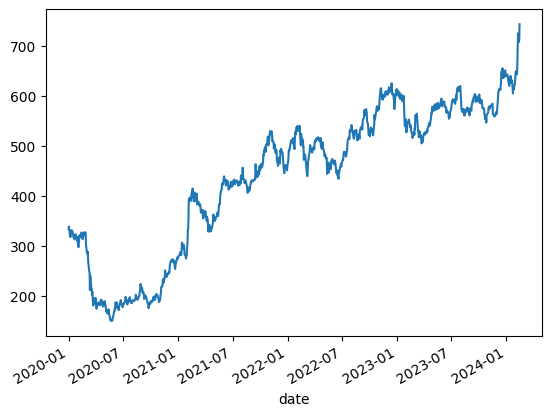

In [8]:
target_column = sbin['close']
target_column.plot()

In [9]:
# [[[1], [2], [3], [4], [5]]] [6]
# [[[2], [3], [4], [5], [6]]] [7]
# [[[3], [4], [5], [6], [7]]] [8]

def df_to_X_y(df, window_size=5):
  df_as_np = df.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np)-window_size):
    row = [[a] for a in df_as_np[i:i+window_size]]
    X.append(row)
    label = df_as_np[i+window_size]
    y.append(label)
  return np.array(X), np.array(y)

In [10]:
WINDOW_SIZE = 5
X1, y1 = df_to_X_y(target_column, WINDOW_SIZE)
X1.shape, y1.shape

((1061, 5, 1), (1061,))

In [11]:
X_train1, y_train1 = X1[:700], y1[:700]
X_val1, y_val1 = X1[701:800], y1[701:800]
X_test1, y_test1 = X1[801:], y1[801:]
X_train1.shape, y_train1.shape, X_val1.shape, y_val1.shape, X_test1.shape, y_test1.shape

((700, 5, 1), (700,), (99, 5, 1), (99,), (260, 5, 1), (260,))

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

model1 = Sequential()
model1.add(InputLayer((5, 1)))
model1.add(LSTM(64))
model1.add(Dense(8, 'relu'))
model1.add(Dense(1, 'linear'))

model1.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 64)                16896     
                                                                 
 dense (Dense)               (None, 8)                 520       
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 17425 (68.07 KB)
Trainable params: 17425 (68.07 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [21]:
cp1 = ModelCheckpoint('model1/', save_best_only=True)
model1.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.002), metrics=[RootMeanSquaredError()])

In [22]:
model1.fit(X_train1, y_train1, validation_data=(X_val1, y_val1), epochs=30, callbacks=[cp1])

Epoch 1/30
18/22 [=======================>......] - ETA: 0s - loss: 15359.8262 - root_mean_squared_error: 123.9348INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


22/22 [==============================] - 5s 156ms/step - loss: 15500.8076 - root_mean_squared_error: 124.5022 - val_loss: 45111.8281 - val_root_mean_squared_error: 212.3954
Epoch 2/30
22/22 [==============================] - 0s 8ms/step - loss: 15355.6074 - root_mean_squared_error: 123.9177 - val_loss: 47339.5742 - val_root_mean_squared_error: 217.5766
Epoch 3/30
22/22 [==============================] - 0s 10ms/step - loss: 15318.8828 - root_mean_squared_error: 123.7695 - val_loss: 47571.3398 - val_root_mean_squared_error: 218.1086
Epoch 4/30
22/22 [==============================] - 0s 8ms/step - loss: 15274.5898 - root_mean_squared_error: 123.5904 - val_loss: 47967.8242 - val_root_mean_squared_error: 219.0156
Epoch 5/30
22/22 [==============================] - 0s 8ms/step - loss: 15012.2354 - root_mean_squared_error: 122.5244 - val_loss: 48224.5117 - val_root_mean_squared_error: 219.6008
Epoch 6/30
22/22 [==============================] - 0s 7ms/step - loss: 14632.8398 - root_mean_squ

INFO:tensorflow:Assets written to: model1\assets


22/22 [==============================] - 4s 168ms/step - loss: 13433.9658 - root_mean_squared_error: 115.9050 - val_loss: 44153.5195 - val_root_mean_squared_error: 210.1274
Epoch 10/30
18/22 [=======================>......] - ETA: 0s - loss: 13046.4219 - root_mean_squared_error: 114.2209INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


22/22 [==============================] - 3s 160ms/step - loss: 12915.3828 - root_mean_squared_error: 113.6459 - val_loss: 43487.1016 - val_root_mean_squared_error: 208.5356
Epoch 11/30
19/22 [========================>.....] - ETA: 0s - loss: 12592.7061 - root_mean_squared_error: 112.2172INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


22/22 [==============================] - 4s 175ms/step - loss: 12467.8740 - root_mean_squared_error: 111.6596 - val_loss: 42512.0742 - val_root_mean_squared_error: 206.1846
Epoch 12/30
19/22 [========================>.....] - ETA: 0s - loss: 12066.5771 - root_mean_squared_error: 109.8480INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


22/22 [==============================] - 4s 191ms/step - loss: 12059.7285 - root_mean_squared_error: 109.8168 - val_loss: 41197.7461 - val_root_mean_squared_error: 202.9723
Epoch 13/30
19/22 [========================>.....] - ETA: 0s - loss: 11859.5957 - root_mean_squared_error: 108.9018INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


22/22 [==============================] - 4s 175ms/step - loss: 11693.1143 - root_mean_squared_error: 108.1347 - val_loss: 40733.2305 - val_root_mean_squared_error: 201.8248
Epoch 14/30
22/22 [==============================] - ETA: 0s - loss: 11343.1650 - root_mean_squared_error: 106.5043INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


22/22 [==============================] - 3s 155ms/step - loss: 11343.1650 - root_mean_squared_error: 106.5043 - val_loss: 39783.4180 - val_root_mean_squared_error: 199.4578
Epoch 15/30
19/22 [========================>.....] - ETA: 0s - loss: 11207.0117 - root_mean_squared_error: 105.8632INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


22/22 [==============================] - 3s 158ms/step - loss: 11046.0381 - root_mean_squared_error: 105.1001 - val_loss: 38702.3750 - val_root_mean_squared_error: 196.7292
Epoch 16/30
18/22 [=======================>......] - ETA: 0s - loss: 10904.9414 - root_mean_squared_error: 104.4267INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


22/22 [==============================] - 4s 194ms/step - loss: 10793.8389 - root_mean_squared_error: 103.8934 - val_loss: 38069.5391 - val_root_mean_squared_error: 195.1142
Epoch 17/30
19/22 [========================>.....] - ETA: 0s - loss: 10551.9521 - root_mean_squared_error: 102.7227INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


22/22 [==============================] - 3s 155ms/step - loss: 10450.0400 - root_mean_squared_error: 102.2254 - val_loss: 37821.9453 - val_root_mean_squared_error: 194.4787
Epoch 18/30
18/22 [=======================>......] - ETA: 0s - loss: 9888.9307 - root_mean_squared_error: 99.4431INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


22/22 [==============================] - 3s 152ms/step - loss: 10119.2764 - root_mean_squared_error: 100.5946 - val_loss: 37474.4883 - val_root_mean_squared_error: 193.5833
Epoch 19/30
17/22 [======================>.......] - ETA: 0s - loss: 9986.0303 - root_mean_squared_error: 99.9301  INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


22/22 [==============================] - 4s 178ms/step - loss: 9661.6895 - root_mean_squared_error: 98.2939 - val_loss: 37010.0508 - val_root_mean_squared_error: 192.3800
Epoch 20/30
20/22 [==========================>...] - ETA: 0s - loss: 9416.6123 - root_mean_squared_error: 97.0392INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


22/22 [==============================] - 3s 152ms/step - loss: 9319.5039 - root_mean_squared_error: 96.5376 - val_loss: 34898.9688 - val_root_mean_squared_error: 186.8127
Epoch 21/30
22/22 [==============================] - 0s 8ms/step - loss: 8993.6182 - root_mean_squared_error: 94.8347 - val_loss: 35024.7461 - val_root_mean_squared_error: 187.1490
Epoch 22/30
22/22 [==============================] - 0s 8ms/step - loss: 8764.4385 - root_mean_squared_error: 93.6186 - val_loss: 35053.3242 - val_root_mean_squared_error: 187.2253
Epoch 23/30
20/22 [==========================>...] - ETA: 0s - loss: 8384.1475 - root_mean_squared_error: 91.5650INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


22/22 [==============================] - 3s 154ms/step - loss: 8457.4531 - root_mean_squared_error: 91.9644 - val_loss: 33579.8359 - val_root_mean_squared_error: 183.2480
Epoch 24/30
18/22 [=======================>......] - ETA: 0s - loss: 8390.2012 - root_mean_squared_error: 91.5980INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


22/22 [==============================] - 3s 163ms/step - loss: 8285.0625 - root_mean_squared_error: 91.0223 - val_loss: 33501.0586 - val_root_mean_squared_error: 183.0329
Epoch 25/30
22/22 [==============================] - ETA: 0s - loss: 7859.0752 - root_mean_squared_error: 88.6514INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


22/22 [==============================] - 4s 169ms/step - loss: 7859.0752 - root_mean_squared_error: 88.6514 - val_loss: 32089.5430 - val_root_mean_squared_error: 179.1355
Epoch 26/30
19/22 [========================>.....] - ETA: 0s - loss: 7413.0952 - root_mean_squared_error: 86.0993INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


22/22 [==============================] - 3s 161ms/step - loss: 7348.0391 - root_mean_squared_error: 85.7207 - val_loss: 30946.2598 - val_root_mean_squared_error: 175.9155
Epoch 27/30
12/22 [===============>..............] - ETA: 0s - loss: 7037.9868 - root_mean_squared_error: 83.8927INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


22/22 [==============================] - 3s 156ms/step - loss: 6927.2607 - root_mean_squared_error: 83.2302 - val_loss: 30008.9375 - val_root_mean_squared_error: 173.2309
Epoch 28/30
20/22 [==========================>...] - ETA: 0s - loss: 6431.9976 - root_mean_squared_error: 80.1997INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


22/22 [==============================] - 4s 170ms/step - loss: 6443.7812 - root_mean_squared_error: 80.2732 - val_loss: 28395.0508 - val_root_mean_squared_error: 168.5083
Epoch 29/30
21/22 [===========================>..] - ETA: 0s - loss: 6137.4453 - root_mean_squared_error: 78.3419INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


22/22 [==============================] - 3s 145ms/step - loss: 6160.2529 - root_mean_squared_error: 78.4873 - val_loss: 27498.7695 - val_root_mean_squared_error: 165.8275
Epoch 30/30
22/22 [==============================] - ETA: 0s - loss: 5916.4941 - root_mean_squared_error: 76.9187INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


22/22 [==============================] - 3s 159ms/step - loss: 5916.4941 - root_mean_squared_error: 76.9187 - val_loss: 26673.3027 - val_root_mean_squared_error: 163.3196


In [23]:
from tensorflow.keras.models import load_model
model1 = load_model('model1/')

In [24]:
train_predictions = model1.predict(X_train1).flatten()
train_results = pd.DataFrame(data={'Train Predictions':train_predictions, 'Actuals':y_train1})
train_results

22/22 [==============================] - 1s 3ms/step


,Train Predictions,Actuals
0,330.495422,319.80
1,329.155151,330.20
2,329.429199,332.25
3,330.236877,330.75
4,331.757965,328.00
...,...,...
695,420.760834,553.35
696,420.772339,554.90
697,420.779968,558.00
698,420.789795,571.75


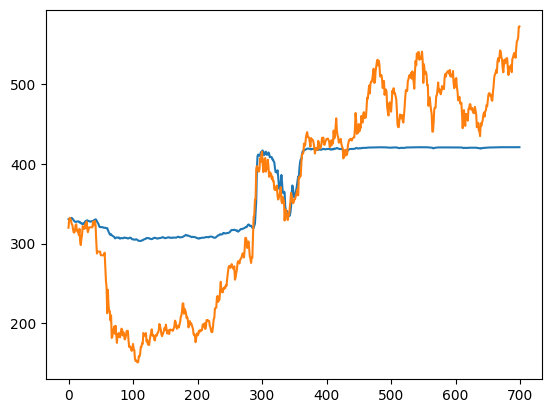

In [26]:
import matplotlib.pyplot as plt
plt.plot(train_results['Train Predictions'])
plt.plot(train_results['Actuals'])

In [27]:
val_predictions = model1.predict(X_val1).flatten()
val_results = pd.DataFrame(data={'Val Predictions':val_predictions, 'Actuals':y_val1})
val_results

4/4 [==============================] - 0s 3ms/step


,Val Predictions,Actuals
0,420.814117,572.25
1,420.821655,574.05
2,420.825104,569.70
3,420.823669,567.30
4,420.822815,550.60
...,...,...
94,420.812408,538.20
95,420.792847,553.50
96,420.791687,527.35
97,420.755737,528.10


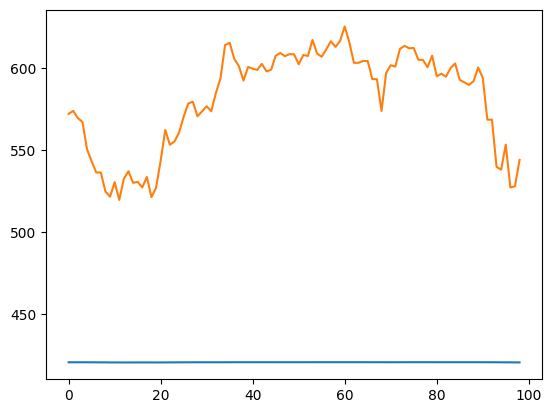

In [29]:
plt.plot(val_results['Val Predictions'])
plt.plot(val_results['Actuals'])

In [30]:
test_predictions = model1.predict(X_test1).flatten()
test_results = pd.DataFrame(data={'Test Predictions':test_predictions, 'Actuals':y_test1})
test_results

9/9 [==============================] - 0s 4ms/step


,Test Predictions,Actuals
0,420.761780,547.10
1,420.764465,549.75
2,420.775269,550.80
3,420.782593,553.05
4,420.786926,537.50
...,...,...
255,420.897095,699.55
256,420.901917,725.25
257,420.908081,707.90
258,420.912170,713.45


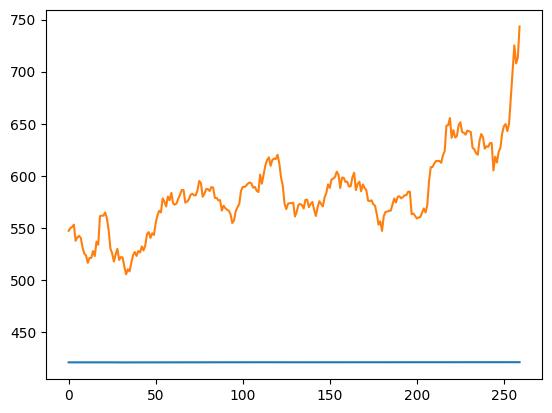

In [33]:
plt.plot(test_results['Test Predictions'])
plt.plot(test_results['Actuals'])

In [34]:
# Part 2

In [35]:
from sklearn.metrics import mean_squared_error as mse

def plot_predictions1(model, X, y, start=0, end=100):
  predictions = model.predict(X).flatten()
  df = pd.DataFrame(data={'Predictions':predictions, 'Actuals':y})
  plt.plot(df['Predictions'][start:end])
  plt.plot(df['Actuals'][start:end])
  return df, mse(y, predictions)

9/9 [==============================] - 0s 3ms/step


(     Predictions  Actuals
 0     420.761780   547.10
 1     420.764465   549.75
 2     420.775269   550.80
 3     420.782593   553.05
 4     420.786926   537.50
 ..           ...      ...
 255   420.897095   699.55
 256   420.901917   725.25
 257   420.908081   707.90
 258   420.912170   713.45
 259   420.915100   743.40
 
 [260 rows x 2 columns],
 27900.376331109124)

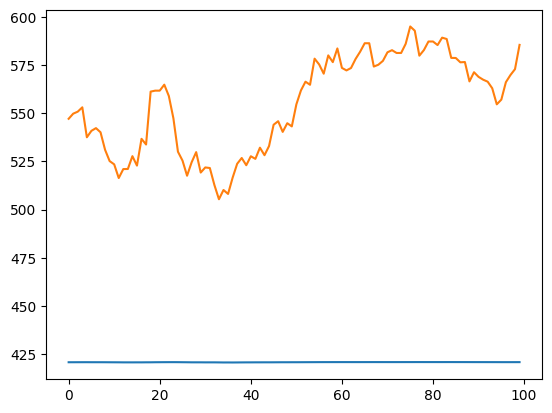

In [36]:
plot_predictions1(model1, X_test1, y_test1)

In [37]:
model2 = Sequential()
model2.add(InputLayer((5, 1)))
model2.add(Conv1D(64, kernel_size=2))
model2.add(Flatten())
model2.add(Dense(8, 'relu'))
model2.add(Dense(1, 'linear'))

model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 4, 64)             192       
                                                                 
 flatten (Flatten)           (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 8)                 2056      
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 2257 (8.82 KB)
Trainable params: 2257 (8.82 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [38]:
cp2 = ModelCheckpoint('model2/', save_best_only=True)
model2.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.009), metrics=[RootMeanSquaredError()])

In [39]:
model2.fit(X_train1, y_train1, validation_data=(X_val1, y_val1), epochs=30, callbacks=[cp2])

Epoch 1/30
18/22 [=======================>......] - ETA: 0s - loss: 28976.3535 - root_mean_squared_error: 170.2244  INFO:tensorflow:Assets written to: model2\assets


INFO:tensorflow:Assets written to: model2\assets


22/22 [==============================] - 1s 39ms/step - loss: 24888.1992 - root_mean_squared_error: 157.7599 - val_loss: 3828.0293 - val_root_mean_squared_error: 61.8711
Epoch 2/30
21/22 [===========================>..] - ETA: 0s - loss: 1013.4478 - root_mean_squared_error: 31.8347INFO:tensorflow:Assets written to: model2\assets


INFO:tensorflow:Assets written to: model2\assets


22/22 [==============================] - 1s 24ms/step - loss: 980.6289 - root_mean_squared_error: 31.3150 - val_loss: 189.4333 - val_root_mean_squared_error: 13.7635
Epoch 3/30
22/22 [==============================] - 0s 4ms/step - loss: 217.6935 - root_mean_squared_error: 14.7544 - val_loss: 343.3486 - val_root_mean_squared_error: 18.5297
Epoch 4/30
22/22 [==============================] - 0s 4ms/step - loss: 153.0420 - root_mean_squared_error: 12.3710 - val_loss: 202.8186 - val_root_mean_squared_error: 14.2414
Epoch 5/30
22/22 [==============================] - 0s 5ms/step - loss: 141.4713 - root_mean_squared_error: 11.8942 - val_loss: 193.9204 - val_root_mean_squared_error: 13.9255
Epoch 6/30
22/22 [==============================] - 0s 4ms/step - loss: 141.5241 - root_mean_squared_error: 11.8964 - val_loss: 242.9943 - val_root_mean_squared_error: 15.5883
Epoch 7/30
 1/22 [>.............................] - ETA: 0s - loss: 94.4836 - root_mean_squared_error: 9.7203INFO:tensorflow:Asset

INFO:tensorflow:Assets written to: model2\assets


22/22 [==============================] - 1s 26ms/step - loss: 142.5784 - root_mean_squared_error: 11.9406 - val_loss: 186.2238 - val_root_mean_squared_error: 13.6464
Epoch 8/30
22/22 [==============================] - 0s 5ms/step - loss: 140.1906 - root_mean_squared_error: 11.8402 - val_loss: 196.5412 - val_root_mean_squared_error: 14.0193
Epoch 9/30
22/22 [==============================] - 0s 4ms/step - loss: 143.9817 - root_mean_squared_error: 11.9992 - val_loss: 217.2441 - val_root_mean_squared_error: 14.7392
Epoch 10/30
21/22 [===========================>..] - ETA: 0s - loss: 145.9387 - root_mean_squared_error: 12.0805INFO:tensorflow:Assets written to: model2\assets


INFO:tensorflow:Assets written to: model2\assets


22/22 [==============================] - 1s 29ms/step - loss: 143.1482 - root_mean_squared_error: 11.9645 - val_loss: 181.0375 - val_root_mean_squared_error: 13.4550
Epoch 11/30
22/22 [==============================] - 0s 5ms/step - loss: 136.0471 - root_mean_squared_error: 11.6639 - val_loss: 187.0529 - val_root_mean_squared_error: 13.6767
Epoch 12/30
18/22 [=======================>......] - ETA: 0s - loss: 140.0137 - root_mean_squared_error: 11.8327INFO:tensorflow:Assets written to: model2\assets


INFO:tensorflow:Assets written to: model2\assets


22/22 [==============================] - 1s 27ms/step - loss: 137.2359 - root_mean_squared_error: 11.7148 - val_loss: 178.6585 - val_root_mean_squared_error: 13.3663
Epoch 13/30
22/22 [==============================] - 0s 5ms/step - loss: 133.7178 - root_mean_squared_error: 11.5636 - val_loss: 183.9826 - val_root_mean_squared_error: 13.5640
Epoch 14/30
22/22 [==============================] - 0s 5ms/step - loss: 136.6428 - root_mean_squared_error: 11.6894 - val_loss: 203.5629 - val_root_mean_squared_error: 14.2675
Epoch 15/30
22/22 [==============================] - 0s 5ms/step - loss: 137.3948 - root_mean_squared_error: 11.7216 - val_loss: 210.6371 - val_root_mean_squared_error: 14.5133
Epoch 16/30
22/22 [==============================] - ETA: 0s - loss: 130.0955 - root_mean_squared_error: 11.4059INFO:tensorflow:Assets written to: model2\assets


INFO:tensorflow:Assets written to: model2\assets


22/22 [==============================] - 1s 27ms/step - loss: 130.0955 - root_mean_squared_error: 11.4059 - val_loss: 173.7113 - val_root_mean_squared_error: 13.1800
Epoch 17/30
22/22 [==============================] - 0s 5ms/step - loss: 127.8896 - root_mean_squared_error: 11.3088 - val_loss: 181.7318 - val_root_mean_squared_error: 13.4808
Epoch 18/30
22/22 [==============================] - 0s 5ms/step - loss: 127.5741 - root_mean_squared_error: 11.2949 - val_loss: 195.9866 - val_root_mean_squared_error: 13.9995
Epoch 19/30
22/22 [==============================] - 0s 4ms/step - loss: 133.4406 - root_mean_squared_error: 11.5516 - val_loss: 175.2852 - val_root_mean_squared_error: 13.2395
Epoch 20/30
19/22 [========================>.....] - ETA: 0s - loss: 133.0295 - root_mean_squared_error: 11.5338INFO:tensorflow:Assets written to: model2\assets


INFO:tensorflow:Assets written to: model2\assets


22/22 [==============================] - 1s 28ms/step - loss: 130.5439 - root_mean_squared_error: 11.4256 - val_loss: 167.1694 - val_root_mean_squared_error: 12.9294
Epoch 21/30
22/22 [==============================] - 0s 5ms/step - loss: 125.0503 - root_mean_squared_error: 11.1826 - val_loss: 274.6873 - val_root_mean_squared_error: 16.5737
Epoch 22/30
22/22 [==============================] - 0s 4ms/step - loss: 127.1182 - root_mean_squared_error: 11.2747 - val_loss: 212.8283 - val_root_mean_squared_error: 14.5886
Epoch 23/30
22/22 [==============================] - 0s 4ms/step - loss: 121.7049 - root_mean_squared_error: 11.0320 - val_loss: 169.0172 - val_root_mean_squared_error: 13.0007
Epoch 24/30
22/22 [==============================] - 0s 5ms/step - loss: 122.2632 - root_mean_squared_error: 11.0573 - val_loss: 210.4183 - val_root_mean_squared_error: 14.5058
Epoch 25/30
22/22 [==============================] - 0s 5ms/step - loss: 122.1603 - root_mean_squared_error: 11.0526 - val_los

INFO:tensorflow:Assets written to: model2\assets


22/22 [==============================] - 1s 30ms/step - loss: 114.9677 - root_mean_squared_error: 10.7223 - val_loss: 164.2633 - val_root_mean_squared_error: 12.8165


In [40]:
model3 = Sequential()
model3.add(InputLayer((5, 1)))
model3.add(GRU(64))
model3.add(Dense(8, 'relu'))
model3.add(Dense(1, 'linear'))
model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 64)                12864     
                                                                 
 dense_4 (Dense)             (None, 8)                 520       
                                                                 
 dense_5 (Dense)             (None, 1)                 9         
                                                                 
Total params: 13393 (52.32 KB)
Trainable params: 13393 (52.32 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [41]:
cp3 = ModelCheckpoint('model3/', save_best_only=True)
model3.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.009), metrics=[RootMeanSquaredError()])

In [42]:
model3.fit(X_train1, y_train1, validation_data=(X_val1, y_val1), epochs=30, callbacks=[cp3])

Epoch 1/30
21/22 [===========================>..] - ETA: 0s - loss: 144186.8125 - root_mean_squared_error: 379.7194INFO:tensorflow:Assets written to: model3\assets


INFO:tensorflow:Assets written to: model3\assets


22/22 [==============================] - 7s 195ms/step - loss: 143602.3750 - root_mean_squared_error: 378.9490 - val_loss: 323495.3438 - val_root_mean_squared_error: 568.7665
Epoch 2/30
17/22 [======================>.......] - ETA: 0s - loss: 132304.7969 - root_mean_squared_error: 363.7373INFO:tensorflow:Assets written to: model3\assets


INFO:tensorflow:Assets written to: model3\assets


22/22 [==============================] - 4s 175ms/step - loss: 131586.0469 - root_mean_squared_error: 362.7479 - val_loss: 298010.1875 - val_root_mean_squared_error: 545.9031
Epoch 3/30
22/22 [==============================] - ETA: 0s - loss: 112725.3750 - root_mean_squared_error: 335.7460INFO:tensorflow:Assets written to: model3\assets


INFO:tensorflow:Assets written to: model3\assets


22/22 [==============================] - 3s 157ms/step - loss: 112725.3750 - root_mean_squared_error: 335.7460 - val_loss: 260257.7969 - val_root_mean_squared_error: 510.1547
Epoch 4/30
17/22 [======================>.......] - ETA: 0s - loss: 92099.4688 - root_mean_squared_error: 303.4789INFO:tensorflow:Assets written to: model3\assets


INFO:tensorflow:Assets written to: model3\assets


22/22 [==============================] - 3s 152ms/step - loss: 88510.5312 - root_mean_squared_error: 297.5072 - val_loss: 213343.0469 - val_root_mean_squared_error: 461.8907
Epoch 5/30
19/22 [========================>.....] - ETA: 0s - loss: 63476.9531 - root_mean_squared_error: 251.9463INFO:tensorflow:Assets written to: model3\assets


INFO:tensorflow:Assets written to: model3\assets


22/22 [==============================] - 3s 137ms/step - loss: 62610.9375 - root_mean_squared_error: 250.2218 - val_loss: 164016.1562 - val_root_mean_squared_error: 404.9891
Epoch 6/30
18/22 [=======================>......] - ETA: 0s - loss: 41884.0820 - root_mean_squared_error: 204.6560INFO:tensorflow:Assets written to: model3\assets


INFO:tensorflow:Assets written to: model3\assets


22/22 [==============================] - 3s 148ms/step - loss: 40126.0312 - root_mean_squared_error: 200.3148 - val_loss: 117458.0703 - val_root_mean_squared_error: 342.7216
Epoch 7/30
18/22 [=======================>......] - ETA: 0s - loss: 25430.6270 - root_mean_squared_error: 159.4698INFO:tensorflow:Assets written to: model3\assets


INFO:tensorflow:Assets written to: model3\assets


22/22 [==============================] - 3s 152ms/step - loss: 24958.2090 - root_mean_squared_error: 157.9817 - val_loss: 83684.6797 - val_root_mean_squared_error: 289.2831
Epoch 8/30
16/22 [====================>.........] - ETA: 0s - loss: 18518.3926 - root_mean_squared_error: 136.0823INFO:tensorflow:Assets written to: model3\assets


INFO:tensorflow:Assets written to: model3\assets


22/22 [==============================] - 4s 191ms/step - loss: 17992.6641 - root_mean_squared_error: 134.1367 - val_loss: 62684.0117 - val_root_mean_squared_error: 250.3678
Epoch 9/30
18/22 [=======================>......] - ETA: 0s - loss: 15920.5830 - root_mean_squared_error: 126.1768INFO:tensorflow:Assets written to: model3\assets


INFO:tensorflow:Assets written to: model3\assets


22/22 [==============================] - 3s 157ms/step - loss: 15762.1641 - root_mean_squared_error: 125.5475 - val_loss: 52801.2109 - val_root_mean_squared_error: 229.7851
Epoch 10/30
18/22 [=======================>......] - ETA: 0s - loss: 15043.8643 - root_mean_squared_error: 122.6534INFO:tensorflow:Assets written to: model3\assets


INFO:tensorflow:Assets written to: model3\assets


22/22 [==============================] - 3s 154ms/step - loss: 15359.8281 - root_mean_squared_error: 123.9348 - val_loss: 48814.8672 - val_root_mean_squared_error: 220.9409
Epoch 11/30
18/22 [=======================>......] - ETA: 0s - loss: 15160.6426 - root_mean_squared_error: 123.1286INFO:tensorflow:Assets written to: model3\assets


INFO:tensorflow:Assets written to: model3\assets


22/22 [==============================] - 3s 153ms/step - loss: 15329.7344 - root_mean_squared_error: 123.8133 - val_loss: 47742.1328 - val_root_mean_squared_error: 218.4997
Epoch 12/30
22/22 [==============================] - 0s 9ms/step - loss: 15271.5781 - root_mean_squared_error: 123.5782 - val_loss: 48753.8906 - val_root_mean_squared_error: 220.8028
Epoch 13/30
22/22 [==============================] - 0s 9ms/step - loss: 14999.0947 - root_mean_squared_error: 122.4708 - val_loss: 48038.4609 - val_root_mean_squared_error: 219.1768
Epoch 14/30
18/22 [=======================>......] - ETA: 0s - loss: 14745.7227 - root_mean_squared_error: 121.4320INFO:tensorflow:Assets written to: model3\assets


INFO:tensorflow:Assets written to: model3\assets


22/22 [==============================] - 4s 170ms/step - loss: 14694.7012 - root_mean_squared_error: 121.2217 - val_loss: 46978.5664 - val_root_mean_squared_error: 216.7454
Epoch 15/30
16/22 [====================>.........] - ETA: 0s - loss: 14211.6387 - root_mean_squared_error: 119.2126INFO:tensorflow:Assets written to: model3\assets


INFO:tensorflow:Assets written to: model3\assets


22/22 [==============================] - 3s 148ms/step - loss: 14284.0898 - root_mean_squared_error: 119.5161 - val_loss: 46541.9648 - val_root_mean_squared_error: 215.7359
Epoch 16/30
18/22 [=======================>......] - ETA: 0s - loss: 14193.1719 - root_mean_squared_error: 119.1351INFO:tensorflow:Assets written to: model3\assets


INFO:tensorflow:Assets written to: model3\assets


22/22 [==============================] - 3s 136ms/step - loss: 13789.0459 - root_mean_squared_error: 117.4268 - val_loss: 44884.3477 - val_root_mean_squared_error: 211.8593
Epoch 17/30
16/22 [====================>.........] - ETA: 0s - loss: 13825.4209 - root_mean_squared_error: 117.5816INFO:tensorflow:Assets written to: model3\assets


INFO:tensorflow:Assets written to: model3\assets


22/22 [==============================] - 3s 151ms/step - loss: 13411.6904 - root_mean_squared_error: 115.8089 - val_loss: 44715.3398 - val_root_mean_squared_error: 211.4600
Epoch 18/30
19/22 [========================>.....] - ETA: 0s - loss: 13397.7207 - root_mean_squared_error: 115.7485INFO:tensorflow:Assets written to: model3\assets


INFO:tensorflow:Assets written to: model3\assets


22/22 [==============================] - 3s 156ms/step - loss: 13052.3340 - root_mean_squared_error: 114.2468 - val_loss: 43371.4336 - val_root_mean_squared_error: 208.2581
Epoch 19/30
17/22 [======================>.......] - ETA: 0s - loss: 12557.3828 - root_mean_squared_error: 112.0597INFO:tensorflow:Assets written to: model3\assets


INFO:tensorflow:Assets written to: model3\assets


22/22 [==============================] - 4s 189ms/step - loss: 12710.8945 - root_mean_squared_error: 112.7426 - val_loss: 42939.7305 - val_root_mean_squared_error: 207.2190
Epoch 20/30
22/22 [==============================] - 0s 11ms/step - loss: 12419.7002 - root_mean_squared_error: 111.4437 - val_loss: 43193.4766 - val_root_mean_squared_error: 207.8304
Epoch 21/30
15/22 [===================>..........] - ETA: 0s - loss: 12341.8564 - root_mean_squared_error: 111.0939INFO:tensorflow:Assets written to: model3\assets


INFO:tensorflow:Assets written to: model3\assets


22/22 [==============================] - 3s 140ms/step - loss: 12135.7344 - root_mean_squared_error: 110.1623 - val_loss: 41982.2617 - val_root_mean_squared_error: 204.8957
Epoch 22/30
17/22 [======================>.......] - ETA: 0s - loss: 11965.8340 - root_mean_squared_error: 109.3885INFO:tensorflow:Assets written to: model3\assets


INFO:tensorflow:Assets written to: model3\assets


22/22 [==============================] - 3s 134ms/step - loss: 11855.6025 - root_mean_squared_error: 108.8834 - val_loss: 41004.5977 - val_root_mean_squared_error: 202.4959
Epoch 23/30
22/22 [==============================] - ETA: 0s - loss: 11595.2031 - root_mean_squared_error: 107.6810INFO:tensorflow:Assets written to: model3\assets


INFO:tensorflow:Assets written to: model3\assets


22/22 [==============================] - 3s 146ms/step - loss: 11595.2031 - root_mean_squared_error: 107.6810 - val_loss: 40324.9961 - val_root_mean_squared_error: 200.8109
Epoch 24/30
18/22 [=======================>......] - ETA: 0s - loss: 11099.1201 - root_mean_squared_error: 105.3524INFO:tensorflow:Assets written to: model3\assets


INFO:tensorflow:Assets written to: model3\assets


22/22 [==============================] - 4s 170ms/step - loss: 11332.8975 - root_mean_squared_error: 106.4561 - val_loss: 39469.2656 - val_root_mean_squared_error: 198.6687
Epoch 25/30
22/22 [==============================] - ETA: 0s - loss: 11098.6191 - root_mean_squared_error: 105.3500INFO:tensorflow:Assets written to: model3\assets


INFO:tensorflow:Assets written to: model3\assets


22/22 [==============================] - 3s 142ms/step - loss: 11098.6191 - root_mean_squared_error: 105.3500 - val_loss: 39049.9414 - val_root_mean_squared_error: 197.6106
Epoch 26/30
22/22 [==============================] - 0s 7ms/step - loss: 10829.1631 - root_mean_squared_error: 104.0633 - val_loss: 39405.2969 - val_root_mean_squared_error: 198.5077
Epoch 27/30
13/22 [================>.............] - ETA: 0s - loss: 10417.8193 - root_mean_squared_error: 102.0677INFO:tensorflow:Assets written to: model3\assets


INFO:tensorflow:Assets written to: model3\assets


22/22 [==============================] - 3s 151ms/step - loss: 10603.7705 - root_mean_squared_error: 102.9746 - val_loss: 38738.7500 - val_root_mean_squared_error: 196.8216
Epoch 28/30
17/22 [======================>.......] - ETA: 0s - loss: 10375.9541 - root_mean_squared_error: 101.8624INFO:tensorflow:Assets written to: model3\assets


INFO:tensorflow:Assets written to: model3\assets


22/22 [==============================] - 3s 137ms/step - loss: 10422.8867 - root_mean_squared_error: 102.0925 - val_loss: 37788.8008 - val_root_mean_squared_error: 194.3934
Epoch 29/30
18/22 [=======================>......] - ETA: 0s - loss: 10152.0889 - root_mean_squared_error: 100.7576INFO:tensorflow:Assets written to: model3\assets


INFO:tensorflow:Assets written to: model3\assets


22/22 [==============================] - 4s 178ms/step - loss: 10178.3682 - root_mean_squared_error: 100.8879 - val_loss: 37612.8672 - val_root_mean_squared_error: 193.9404
Epoch 30/30
19/22 [========================>.....] - ETA: 0s - loss: 9963.8105 - root_mean_squared_error: 99.8189  INFO:tensorflow:Assets written to: model3\assets


INFO:tensorflow:Assets written to: model3\assets


22/22 [==============================] - 3s 147ms/step - loss: 9913.1475 - root_mean_squared_error: 99.5648 - val_loss: 37149.9961 - val_root_mean_squared_error: 192.7433


In [43]:
temp_df = pd.DataFrame({'Temperature':target_column})
temp_df['Seconds'] = temp_df.index.map(pd.Timestamp.timestamp)
temp_df

,Temperature,Seconds
date,,
2020-01-01,334.45,1.577837e+09
2020-01-02,339.30,1.577923e+09
2020-01-03,333.70,1.578010e+09
2020-01-06,319.00,1.578269e+09
2020-01-07,318.40,1.578355e+09
...,...,...
2024-02-08,699.55,1.707350e+09
2024-02-09,725.25,1.707437e+09
2024-02-12,707.90,1.707696e+09


In [44]:
day = 60*60*24
year = 365.2425*day

temp_df['Day sin'] = np.sin(temp_df['Seconds'] * (2* np.pi / day))
temp_df['Day cos'] = np.cos(temp_df['Seconds'] * (2 * np.pi / day))
temp_df['Year sin'] = np.sin(temp_df['Seconds'] * (2 * np.pi / year))
temp_df['Year cos'] = np.cos(temp_df['Seconds'] * (2 * np.pi / year))
temp_df.head()

,Temperature,Seconds,Day sin,Day cos,Year sin,Year cos
date,,,,,,
2020-01-01,334.45,1.577837e+09,-7.670342e-12,1.0,-0.002150,0.999998
2020-01-02,339.30,1.577923e+09,-3.371804e-12,1.0,0.015052,0.999887
2020-01-03,333.70,1.578010e+09,9.267350e-13,1.0,0.032250,0.999480
2020-01-06,319.00,1.578269e+09,-7.295644e-13,1.0,0.083765,0.996486
2020-01-07,318.40,1.578355e+09,-1.098294e-11,1.0,0.100894,0.994897


In [45]:
temp_df = temp_df.drop('Seconds', axis=1)
temp_df.head()

,Temperature,Day sin,Day cos,Year sin,Year cos
date,,,,,
2020-01-01,334.45,-7.670342e-12,1.0,-0.002150,0.999998
2020-01-02,339.30,-3.371804e-12,1.0,0.015052,0.999887
2020-01-03,333.70,9.267350e-13,1.0,0.032250,0.999480
2020-01-06,319.00,-7.295644e-13,1.0,0.083765,0.996486
2020-01-07,318.40,-1.098294e-11,1.0,0.100894,0.994897


In [46]:
def df_to_X_y2(df, window_size=6):
  df_as_np = df.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np)-window_size):
    row = [r for r in df_as_np[i:i+window_size]]
    X.append(row)
    label = df_as_np[i+window_size][0]
    y.append(label)
  return np.array(X), np.array(y)

In [47]:
X2, y2 = df_to_X_y2(temp_df)
X2.shape, y2.shape

((1060, 6, 5), (1060,))

In [48]:
X2_train, y2_train = X2[:700], y2[:700]
X2_val, y2_val = X2[700:800], y2[700:800]
X2_test, y2_test = X2[800:], y2[800:]
X2_train.shape, y2_train.shape, X2_val.shape, y2_val.shape, X2_test.shape, y2_test.shape

((700, 6, 5), (700,), (100, 6, 5), (100,), (260, 6, 5), (260,))

In [49]:
temp_training_mean = np.mean(X2_train[:, :, 0])
temp_training_std = np.std(X2_train[:, :, 0])
                           
def preprocess(X):
  X[:, :, 0] = (X[:, :, 0] - temp_training_mean) / temp_training_std
  return X

In [50]:
preprocess(X2_train)
preprocess(X2_val)
preprocess(X2_test)

array([[[ 1.42004031e+00, -3.05024836e-12,  1.00000000e+00,
          4.80669420e-01,  8.76901881e-01],
        [ 1.54426587e+00, -1.33036250e-11,  1.00000000e+00,
          4.95682702e-01,  8.68503690e-01],
        [ 1.33194572e+00, -9.00508634e-12,  1.00000000e+00,
          5.10549297e-01,  8.59848484e-01],
        [ 1.33803521e+00, -4.70654772e-12,  1.00000000e+00,
          5.25264806e-01,  8.50938825e-01],
        [ 1.46875622e+00, -4.08009101e-13,  1.00000000e+00,
          5.39824875e-01,  8.41777349e-01],
        [ 1.47849940e+00, -2.06430846e-12,  1.00000000e+00,
          5.82529587e-01,  8.12809498e-01]],

       [[ 1.54426587e+00, -1.33036250e-11,  1.00000000e+00,
          4.95682702e-01,  8.68503690e-01],
        [ 1.33194572e+00, -9.00508634e-12,  1.00000000e+00,
          5.10549297e-01,  8.59848484e-01],
        [ 1.33803521e+00, -4.70654772e-12,  1.00000000e+00,
          5.25264806e-01,  8.50938825e-01],
        [ 1.46875622e+00, -4.08009101e-13,  1.00000000e+00,
  

In [51]:
model4 = Sequential()
model4.add(InputLayer((6, 5)))
model4.add(LSTM(64))
model4.add(Dense(8, 'relu'))
model4.add(Dense(1, 'linear'))

model4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 64)                17920     
                                                                 
 dense_6 (Dense)             (None, 8)                 520       
                                                                 
 dense_7 (Dense)             (None, 1)                 9         
                                                                 
Total params: 18449 (72.07 KB)
Trainable params: 18449 (72.07 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [52]:
cp4 = ModelCheckpoint('model4/', save_best_only=True)
model4.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.009), metrics=[RootMeanSquaredError()])

In [55]:
model4.fit(X2_train, y2_train, validation_data=(X2_val, y2_val), epochs=30, callbacks=[cp4])

Epoch 1/30
22/22 [==============================] - 0s 11ms/step - loss: 66.9332 - root_mean_squared_error: 8.1813 - val_loss: 1365.9514 - val_root_mean_squared_error: 36.9588
Epoch 2/30
22/22 [==============================] - 0s 8ms/step - loss: 63.4859 - root_mean_squared_error: 7.9678 - val_loss: 1698.8925 - val_root_mean_squared_error: 41.2176
Epoch 3/30
22/22 [==============================] - 0s 8ms/step - loss: 64.8820 - root_mean_squared_error: 8.0549 - val_loss: 1491.5288 - val_root_mean_squared_error: 38.6203
Epoch 4/30
22/22 [==============================] - 0s 8ms/step - loss: 68.0302 - root_mean_squared_error: 8.2480 - val_loss: 1564.8024 - val_root_mean_squared_error: 39.5576
Epoch 5/30
22/22 [==============================] - 0s 10ms/step - loss: 68.1114 - root_mean_squared_error: 8.2530 - val_loss: 1579.8221 - val_root_mean_squared_error: 39.7470
Epoch 6/30
22/22 [==============================] - 0s 9ms/step - loss: 64.9191 - root_mean_squared_error: 8.0572 - val_los

9/9 [==============================] - 0s 2ms/step


(     Predictions  Actuals
 0     532.257751   547.10
 1     533.797913   549.75
 2     534.380615   550.80
 3     535.222778   553.05
 4     536.700928   537.50
 ..           ...      ...
 255   559.524780   699.55
 256   559.922241   725.25
 257   560.316406   707.90
 258   560.697571   713.45
 259   561.541687   743.40
 
 [260 rows x 2 columns],
 2013.2566497213113)

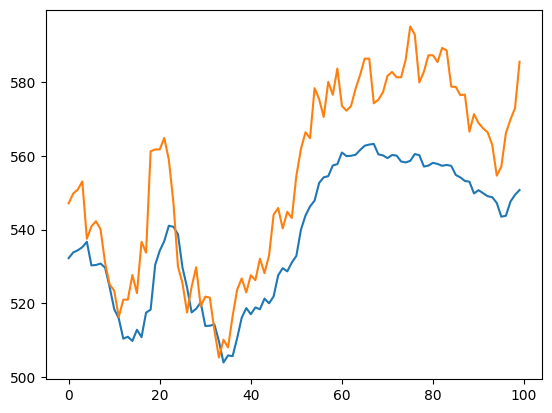

In [56]:
plot_predictions1(model4, X2_test, y2_test)

In [57]:
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM, Dropout

In [70]:
model5 = Sequential()
# model5.add(InputLayer((6, 5)))
model5.add(SimpleRNN(30, input_shape=(6, 5)))
# model5.add(Dropout(rate=0.2))
# model5.add(LSTM(64))
model5.add(Dense(8, 'relu'))
model5.add(Dense(1, 'linear'))

model5.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_3 (SimpleRNN)    (None, 30)                1080      
                                                                 
 dense_11 (Dense)            (None, 8)                 248       
                                                                 
 dense_12 (Dense)            (None, 1)                 9         
                                                                 
Total params: 1337 (5.22 KB)
Trainable params: 1337 (5.22 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [71]:
cp6 = ModelCheckpoint('model5/', save_best_only=True)
model5.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.009), metrics=[RootMeanSquaredError()])

In [72]:
model5.fit(X2_train, y2_train, validation_data=(X2_val, y2_val), epochs=30, callbacks=[cp6])

Epoch 1/30
17/22 [======================>.......] - ETA: 0s - loss: 144613.8281 - root_mean_squared_error: 380.2812 INFO:tensorflow:Assets written to: model5\assets


INFO:tensorflow:Assets written to: model5\assets


22/22 [==============================] - 3s 74ms/step - loss: 143205.7500 - root_mean_squared_error: 378.4254 - val_loss: 317085.2812 - val_root_mean_squared_error: 563.1033
Epoch 2/30
12/22 [===============>..............] - ETA: 0s - loss: 128416.6953 - root_mean_squared_error: 358.3528INFO:tensorflow:Assets written to: model5\assets


INFO:tensorflow:Assets written to: model5\assets


22/22 [==============================] - 2s 74ms/step - loss: 123679.4766 - root_mean_squared_error: 351.6809 - val_loss: 274462.3125 - val_root_mean_squared_error: 523.8915
Epoch 3/30
16/22 [====================>.........] - ETA: 0s - loss: 100114.7266 - root_mean_squared_error: 316.4091INFO:tensorflow:Assets written to: model5\assets


INFO:tensorflow:Assets written to: model5\assets


22/22 [==============================] - 1s 67ms/step - loss: 93656.9688 - root_mean_squared_error: 306.0343 - val_loss: 213638.7344 - val_root_mean_squared_error: 462.2107
Epoch 4/30
15/22 [===================>..........] - ETA: 0s - loss: 64075.3281 - root_mean_squared_error: 253.1310INFO:tensorflow:Assets written to: model5\assets


INFO:tensorflow:Assets written to: model5\assets


22/22 [==============================] - 1s 66ms/step - loss: 59472.7812 - root_mean_squared_error: 243.8704 - val_loss: 147971.3125 - val_root_mean_squared_error: 384.6704
Epoch 5/30
16/22 [====================>.........] - ETA: 0s - loss: 35319.3984 - root_mean_squared_error: 187.9346INFO:tensorflow:Assets written to: model5\assets


INFO:tensorflow:Assets written to: model5\assets


22/22 [==============================] - 1s 65ms/step - loss: 32415.0762 - root_mean_squared_error: 180.0419 - val_loss: 93453.9609 - val_root_mean_squared_error: 305.7024
Epoch 6/30
16/22 [====================>.........] - ETA: 0s - loss: 19957.1660 - root_mean_squared_error: 141.2698INFO:tensorflow:Assets written to: model5\assets


INFO:tensorflow:Assets written to: model5\assets


22/22 [==============================] - 2s 80ms/step - loss: 19058.8594 - root_mean_squared_error: 138.0538 - val_loss: 61387.6445 - val_root_mean_squared_error: 247.7653
Epoch 7/30
16/22 [====================>.........] - ETA: 0s - loss: 15882.9316 - root_mean_squared_error: 126.0275INFO:tensorflow:Assets written to: model5\assets


INFO:tensorflow:Assets written to: model5\assets


22/22 [==============================] - 2s 72ms/step - loss: 15619.0010 - root_mean_squared_error: 124.9760 - val_loss: 49474.2617 - val_root_mean_squared_error: 222.4281
Epoch 8/30
15/22 [===================>..........] - ETA: 0s - loss: 15815.5332 - root_mean_squared_error: 125.7598INFO:tensorflow:Assets written to: model5\assets


INFO:tensorflow:Assets written to: model5\assets


22/22 [==============================] - 1s 60ms/step - loss: 15370.1641 - root_mean_squared_error: 123.9765 - val_loss: 46725.4961 - val_root_mean_squared_error: 216.1608
Epoch 9/30
22/22 [==============================] - 0s 5ms/step - loss: 15359.2832 - root_mean_squared_error: 123.9326 - val_loss: 47868.1562 - val_root_mean_squared_error: 218.7879
Epoch 10/30
17/22 [======================>.......] - ETA: 0s - loss: 14119.9941 - root_mean_squared_error: 118.8276INFO:tensorflow:Assets written to: model5\assets


INFO:tensorflow:Assets written to: model5\assets


22/22 [==============================] - 1s 57ms/step - loss: 13583.2158 - root_mean_squared_error: 116.5471 - val_loss: 45531.0352 - val_root_mean_squared_error: 213.3800
Epoch 11/30
17/22 [======================>.......] - ETA: 0s - loss: 6523.7700 - root_mean_squared_error: 80.7699  INFO:tensorflow:Assets written to: model5\assets


INFO:tensorflow:Assets written to: model5\assets


22/22 [==============================] - 1s 66ms/step - loss: 5995.9062 - root_mean_squared_error: 77.4332 - val_loss: 30716.6445 - val_root_mean_squared_error: 175.2616
Epoch 12/30
19/22 [========================>.....] - ETA: 0s - loss: 2121.8264 - root_mean_squared_error: 46.0633INFO:tensorflow:Assets written to: model5\assets


INFO:tensorflow:Assets written to: model5\assets


22/22 [==============================] - 1s 69ms/step - loss: 2029.5748 - root_mean_squared_error: 45.0508 - val_loss: 18148.4980 - val_root_mean_squared_error: 134.7164
Epoch 13/30
18/22 [=======================>......] - ETA: 0s - loss: 1010.2086 - root_mean_squared_error: 31.7838INFO:tensorflow:Assets written to: model5\assets


INFO:tensorflow:Assets written to: model5\assets


22/22 [==============================] - 1s 66ms/step - loss: 945.6271 - root_mean_squared_error: 30.7511 - val_loss: 12793.1797 - val_root_mean_squared_error: 113.1069
Epoch 14/30
14/22 [==================>...........] - ETA: 0s - loss: 631.3078 - root_mean_squared_error: 25.1258INFO:tensorflow:Assets written to: model5\assets


INFO:tensorflow:Assets written to: model5\assets


22/22 [==============================] - 1s 62ms/step - loss: 520.2031 - root_mean_squared_error: 22.8080 - val_loss: 9866.0039 - val_root_mean_squared_error: 99.3278
Epoch 15/30
13/22 [================>.............] - ETA: 0s - loss: 322.3644 - root_mean_squared_error: 17.9545INFO:tensorflow:Assets written to: model5\assets


INFO:tensorflow:Assets written to: model5\assets


22/22 [==============================] - 1s 65ms/step - loss: 328.0224 - root_mean_squared_error: 18.1114 - val_loss: 8226.3994 - val_root_mean_squared_error: 90.6995
Epoch 16/30
15/22 [===================>..........] - ETA: 0s - loss: 281.0868 - root_mean_squared_error: 16.7656INFO:tensorflow:Assets written to: model5\assets


INFO:tensorflow:Assets written to: model5\assets


22/22 [==============================] - 1s 66ms/step - loss: 281.6973 - root_mean_squared_error: 16.7838 - val_loss: 7073.7285 - val_root_mean_squared_error: 84.1055
Epoch 17/30
13/22 [================>.............] - ETA: 0s - loss: 252.7093 - root_mean_squared_error: 15.8968INFO:tensorflow:Assets written to: model5\assets


INFO:tensorflow:Assets written to: model5\assets


22/22 [==============================] - 2s 76ms/step - loss: 249.5706 - root_mean_squared_error: 15.7978 - val_loss: 6376.6270 - val_root_mean_squared_error: 79.8538
Epoch 18/30
14/22 [==================>...........] - ETA: 0s - loss: 236.1042 - root_mean_squared_error: 15.3657INFO:tensorflow:Assets written to: model5\assets


INFO:tensorflow:Assets written to: model5\assets


22/22 [==============================] - 2s 93ms/step - loss: 210.8288 - root_mean_squared_error: 14.5199 - val_loss: 5722.2246 - val_root_mean_squared_error: 75.6454
Epoch 19/30
20/22 [==========================>...] - ETA: 0s - loss: 202.6832 - root_mean_squared_error: 14.2367INFO:tensorflow:Assets written to: model5\assets


INFO:tensorflow:Assets written to: model5\assets


22/22 [==============================] - 2s 72ms/step - loss: 206.7843 - root_mean_squared_error: 14.3800 - val_loss: 5317.1816 - val_root_mean_squared_error: 72.9190
Epoch 20/30
18/22 [=======================>......] - ETA: 0s - loss: 168.0038 - root_mean_squared_error: 12.9616INFO:tensorflow:Assets written to: model5\assets


INFO:tensorflow:Assets written to: model5\assets


22/22 [==============================] - 1s 63ms/step - loss: 163.1743 - root_mean_squared_error: 12.7740 - val_loss: 4908.5786 - val_root_mean_squared_error: 70.0612
Epoch 21/30
17/22 [======================>.......] - ETA: 0s - loss: 134.8630 - root_mean_squared_error: 11.6131INFO:tensorflow:Assets written to: model5\assets


INFO:tensorflow:Assets written to: model5\assets


22/22 [==============================] - 1s 67ms/step - loss: 138.7021 - root_mean_squared_error: 11.7772 - val_loss: 4580.3423 - val_root_mean_squared_error: 67.6782
Epoch 22/30
19/22 [========================>.....] - ETA: 0s - loss: 132.2774 - root_mean_squared_error: 11.5012INFO:tensorflow:Assets written to: model5\assets


INFO:tensorflow:Assets written to: model5\assets


22/22 [==============================] - 1s 61ms/step - loss: 130.8639 - root_mean_squared_error: 11.4396 - val_loss: 4263.7720 - val_root_mean_squared_error: 65.2976
Epoch 23/30
18/22 [=======================>......] - ETA: 0s - loss: 116.9534 - root_mean_squared_error: 10.8145INFO:tensorflow:Assets written to: model5\assets


INFO:tensorflow:Assets written to: model5\assets


22/22 [==============================] - 1s 63ms/step - loss: 116.8295 - root_mean_squared_error: 10.8088 - val_loss: 3996.6370 - val_root_mean_squared_error: 63.2190
Epoch 24/30
15/22 [===================>..........] - ETA: 0s - loss: 111.4827 - root_mean_squared_error: 10.5585INFO:tensorflow:Assets written to: model5\assets


INFO:tensorflow:Assets written to: model5\assets


22/22 [==============================] - 1s 70ms/step - loss: 110.8483 - root_mean_squared_error: 10.5285 - val_loss: 3782.9421 - val_root_mean_squared_error: 61.5056
Epoch 25/30
14/22 [==================>...........] - ETA: 0s - loss: 119.1548 - root_mean_squared_error: 10.9158INFO:tensorflow:Assets written to: model5\assets


INFO:tensorflow:Assets written to: model5\assets


22/22 [==============================] - 1s 63ms/step - loss: 116.8806 - root_mean_squared_error: 10.8111 - val_loss: 3605.0684 - val_root_mean_squared_error: 60.0422
Epoch 26/30
18/22 [=======================>......] - ETA: 0s - loss: 105.7741 - root_mean_squared_error: 10.2847INFO:tensorflow:Assets written to: model5\assets


INFO:tensorflow:Assets written to: model5\assets


22/22 [==============================] - 1s 69ms/step - loss: 106.2658 - root_mean_squared_error: 10.3085 - val_loss: 3488.1414 - val_root_mean_squared_error: 59.0605
Epoch 27/30
19/22 [========================>.....] - ETA: 0s - loss: 106.1686 - root_mean_squared_error: 10.3038INFO:tensorflow:Assets written to: model5\assets


INFO:tensorflow:Assets written to: model5\assets


22/22 [==============================] - 1s 68ms/step - loss: 107.4900 - root_mean_squared_error: 10.3677 - val_loss: 3310.3799 - val_root_mean_squared_error: 57.5359
Epoch 28/30
19/22 [========================>.....] - ETA: 0s - loss: 118.6688 - root_mean_squared_error: 10.8935INFO:tensorflow:Assets written to: model5\assets


INFO:tensorflow:Assets written to: model5\assets


22/22 [==============================] - 1s 69ms/step - loss: 116.5116 - root_mean_squared_error: 10.7941 - val_loss: 3265.7471 - val_root_mean_squared_error: 57.1467
Epoch 29/30
20/22 [==========================>...] - ETA: 0s - loss: 106.4116 - root_mean_squared_error: 10.3156INFO:tensorflow:Assets written to: model5\assets


INFO:tensorflow:Assets written to: model5\assets


22/22 [==============================] - 2s 98ms/step - loss: 104.4654 - root_mean_squared_error: 10.2208 - val_loss: 3123.4695 - val_root_mean_squared_error: 55.8880
Epoch 30/30
15/22 [===================>..........] - ETA: 0s - loss: 105.0867 - root_mean_squared_error: 10.2512INFO:tensorflow:Assets written to: model5\assets


INFO:tensorflow:Assets written to: model5\assets


22/22 [==============================] - 2s 78ms/step - loss: 105.1857 - root_mean_squared_error: 10.2560 - val_loss: 3033.5718 - val_root_mean_squared_error: 55.0779


9/9 [==============================] - 0s 2ms/step


(     Predictions  Actuals
 0     528.312988   547.10
 1     529.305359   549.75
 2     529.985779   550.80
 3     530.336304   553.05
 4     530.737427   537.50
 ..           ...      ...
 255   536.258301   699.55
 256   536.356384   725.25
 257   536.412476   707.90
 258   536.379639   713.45
 259   536.391663   743.40
 
 [260 rows x 2 columns],
 3807.6581595848584)

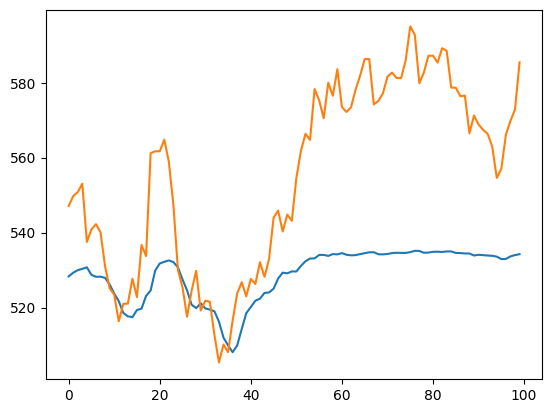

In [73]:
plot_predictions1(model5, X2_test, y2_test)